# Part II - Rider Demographics And Their Bike Share Patterns

## by Secil Carver


## Investigation Overview

> In this investigation, I wanted to look at the characteristics of bike share riders, the duration of rides, time of rides to understand who the bike share service user is and possible explanation of purpose for using this service. The main focus was on the demographics of the riders' (age, gender and user type), day/time the service was used, and the distance traveled.


## Dataset Overview

> There are a little over 180,000 bike share entries in the original dataset with 16 variables such as location coordinations, user birth year and gender. Less than 5% of the data had to be removed because of mostly null values, and a few hundred data point were removed due to unusual outlier behaviour.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# keep only the ones that are within +5 to -5 standard deviations in the column 'member_birth_year'.
gobike = gobike[np.abs(gobike.member_birth_year-gobike.member_birth_year.mean()) <= (5*gobike.member_birth_year.std())]

# change data type of member_birth_year
gobike['member_birth_year'] = gobike['member_birth_year'].astype(int)

# create customer_age column and calculate customers' ages
today = 2022
gobike['customer_age'] = today - gobike['member_birth_year']

## User Age

> There are some outliers in the members birth years such as an entry of 1878. The amount of outliers are insignificant in numbers, however they do skew the graphs. After removing outliers and keeping the data within 5 standard deviation from the mean, the age distribution of the data is concentrated between 25-45.


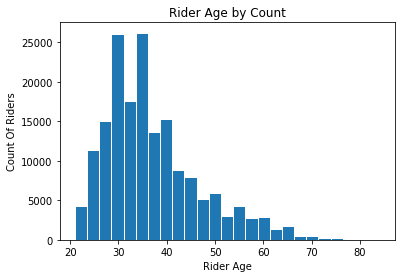

In [4]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}

plt.hist(data=gobike, x='customer_age', bins=25, edgecolor='white')
plt.xlabel('Rider Age')
plt.ylabel('Count Of Riders')
plt.title('Rider Age by Count');

In [5]:
base_color = sb.color_palette()[0]

# keep only the ones that are within +3.5 to -3.5 standard deviations in the column 'duration_sec'.
gobike = gobike[np.abs(gobike.duration_sec-gobike.duration_sec.mean()) <= (3.5*gobike.duration_sec.std())]

gobike['duration_min'] = gobike['duration_sec'] / 60
gobike.duration_min = gobike.duration_min.astype(int)

## Riders daily behaviour

> Riders daily behaviour as well as time of day behaviour reveals more information on what day of the week and what time of day is more popular with riders. Looking at both days of the month, and days of the week, weekends do not seem as popular with riders as weekdays are. 

In [6]:
# change data type for start and end times
gobike['start_time'] = gobike['start_time'].astype('datetime64')
gobike['end_time'] = gobike['end_time'].astype('datetime64')

# get day of the month
gobike['day'] = gobike['start_time'].apply(lambda r:r.day)

# get day of the week from start_time
from datetime import datetime

gobike['day_of_week'] = gobike['start_time'].dt.day_name()

# extract the time of day out of start_time
gobike['time'] = gobike['start_time'].dt.strftime('%H:%M:%S')

# create time of day sessions
gobike=gobike.assign(session=pd.cut(gobike.time,['0','12','18','23'],
                            labels=['Morning','Afternoon','Evening'],
                            include_lowest=True))
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

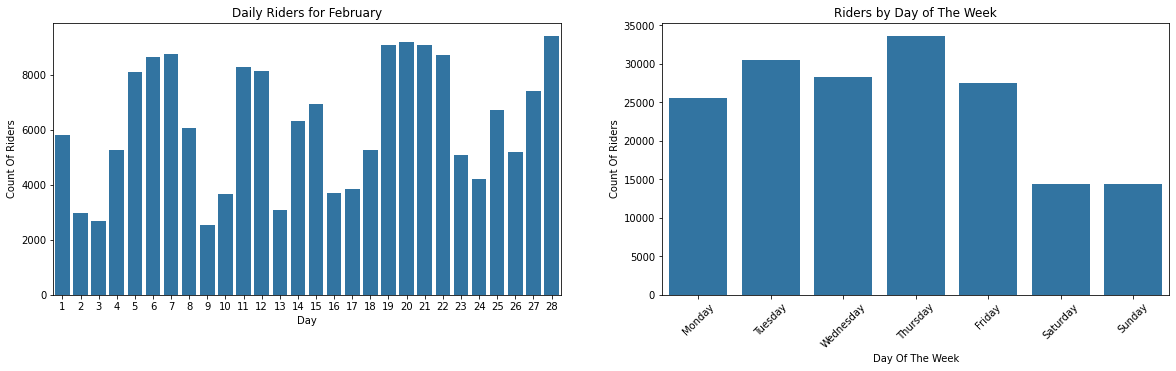

In [7]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}

def riders_per_day():
    day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sb.countplot(data=gobike, x='day', color=base_color)
    plt.ylabel('Count Of Riders')
    plt.xlabel('Day')
    plt.title('Daily Riders for February')


    plt.subplot(1,2,2)
    sb.countplot(data=gobike, x='day_of_week', order = day_order, color=base_color)
    plt.xticks(rotation=45);
    plt.title('Riders by Day of The Week')
    plt.xlabel('Day Of The Week')
    plt.ylabel('Count Of Riders');
riders_per_day()

## Distance traveled by riders

> At first glance the distance traveled for bikers were clustered around 1 mile because of an outlier. Changing the x-axis limit to 5 miles we can get a closer look at the numbers. We now see the distance taveled by most bikers is less than 3 miles.

In [8]:
# create coordinates to calculate distance
gobike['start_coord'] = [', '.join(str(x) for x in y) 
                     for y in map(tuple, gobike[['start_station_latitude', 'start_station_longitude']].values)]
gobike['end_coord'] = [', '.join(str(x) for x in y) 
                     for y in map(tuple, gobike[['end_station_latitude', 'end_station_longitude']].values)]

# calculate distance traveled by riders
import geopy.distance
from geopy.distance import geodesic
def distance (row):
    start = (row['start_station_latitude'], row['start_station_longitude'])
    stop = (row['end_station_latitude'], row['end_station_longitude'])

    return geodesic(start, stop).miles
gobike['distance'] = gobike.apply (lambda row: distance(row),axis=1)

# drop the single outlier in distance column that is skewing the graph
gobike = gobike.drop(gobike[gobike.distance > 10].index)

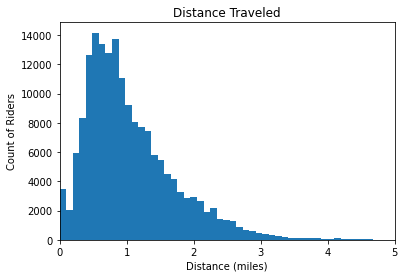

In [9]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}

plt.hist(data=gobike, x='distance', bins=100)
plt.xlim(0,5)
plt.xlabel('Distance (miles)')
plt.ylabel('Count of Riders')
plt.title('Distance Traveled');

## Average ride duration and average distance traveled by riders

- Bike rentals duration per day in February all center around a mean of 10 minutes. The tails of the boxes show a wide variety of outliers daily. The distance per day is more unified, with the mean centered around 1 mile.

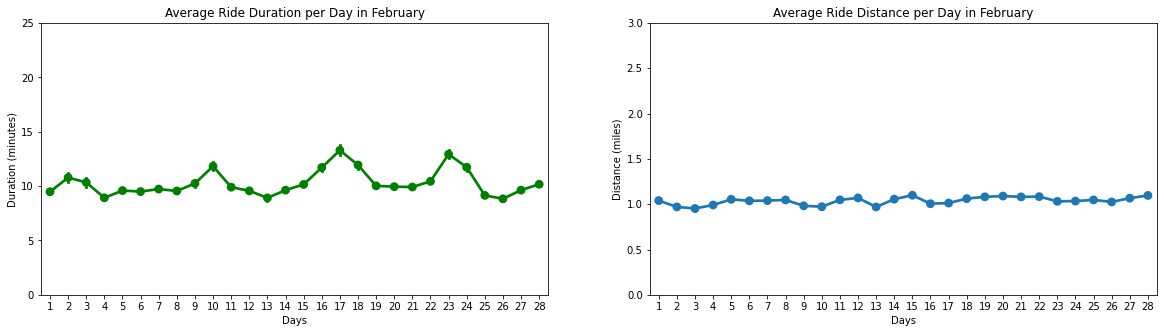

In [10]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}


# eliminate outliers from the graphs with ylim()
def day_figures():
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sb.pointplot(data=gobike, x='day', y='duration_min',color='green')
    plt.ylim(0,25)
    plt.xlabel('Days')
    plt.ylabel('Duration (minutes)')
    plt.title('Average Ride Duration per Day in February');
    

    plt.subplot(1,2,2)
    sb.pointplot(data=gobike, x='day', y='distance', color=base_color)
    plt.ylim(0,3)
    plt.xlabel('Days')
    plt.ylabel('Distance (miles)')
    plt.title('Average Ride Distance per Day in February')
day_figures()

## Rider age and gender distribution

- Upon closer inspection we can conclude male customers who are between the age of 25-45 years of age are the biggest bike share users.

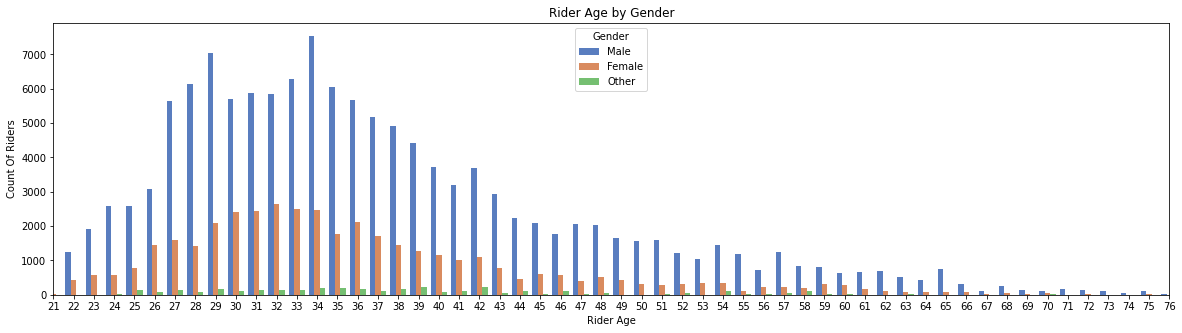

In [11]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}

plt.figure(figsize=(20,5))
sb.countplot(data=gobike, x='customer_age', hue='member_gender', palette='muted')
plt.xlim(0,55)
plt.xlabel('Rider Age')
plt.ylabel('Count Of Riders')
plt.title('Rider Age by Gender')
plt.legend(title='Gender');

## Rider age and the distance traveled

- From the heat map I can clearly see the concentration of age is around 30, and distance traveled is mostly below 3 miles.

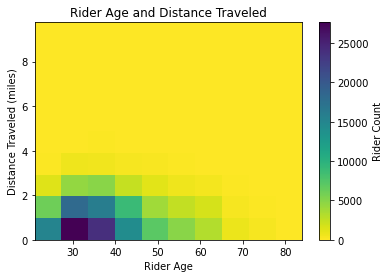

In [12]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}


def age_distance():
    group1 = gobike.groupby(['customer_age', 'distance', 'duration_min']).size()
    group1 = group1.reset_index()
    plt.hist2d(data=gobike, x='customer_age', y='distance', cmap='viridis_r')
    
    plt.xlabel('Rider Age')
    plt.ylabel('Distance Traveled (miles)')
    plt.colorbar(label='Rider Count')
    plt.title('Rider Age and Distance Traveled')
age_distance()

## User type, age, gender based on daily use 

- Subscribers' average age is slightly more than casual customers' average age. Surprisingly the average age among all riders were lower on the weekends than during the week. Also, female riders were more prevelant on the weekends, male riders are more prevelant during the week. 

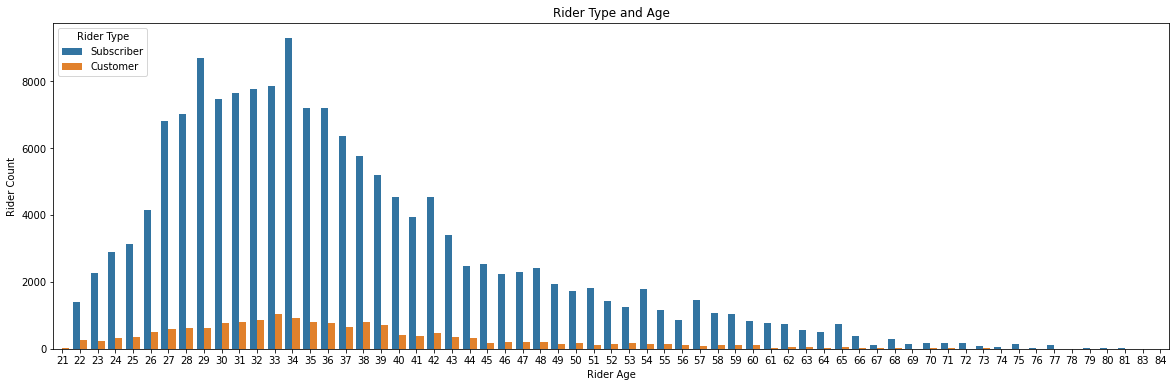

In [13]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}


plt.figure(figsize=(20,6))
sb.countplot(data=gobike, x='customer_age', hue='user_type')
plt.legend(loc=1)
plt.title('Rider Type and Age')
plt.xlabel('Rider Age')
plt.ylabel('Rider Count')
plt.legend(title = 'Rider Type');

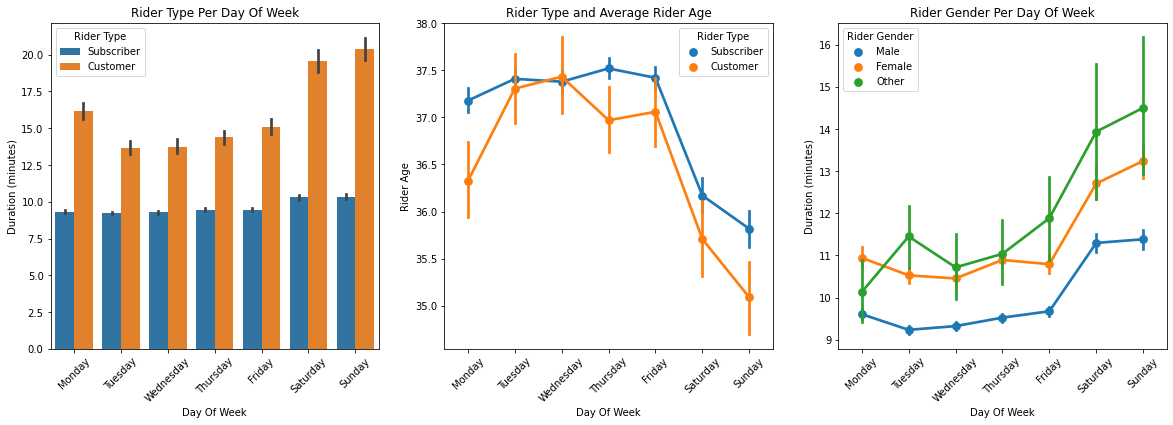

In [14]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}


def user_daily():
    plt.figure(figsize=(20,6))
    (plt.subplot(1,3,1))
    sb.barplot(data=gobike, x="day_of_week", y="duration_min",hue='user_type', order=day_order)
    plt.title('Rider Type Per Day Of Week')
    plt.xticks(rotation=45)
    plt.xlabel('Day Of Week')
    plt.ylabel('Duration (minutes)')
    plt.legend(title='Rider Type');

    plt.subplot(1,3,2)
    sb.pointplot(data=gobike, x='day_of_week', y='customer_age', hue='user_type', order=day_order)
    plt.title('Rider Type and Average Rider Age')
    plt.xticks(rotation=45)
    plt.xlabel('Day Of Week')
    plt.ylabel('Rider Age')
    plt.legend(title='Rider Type');
    
    plt.subplot(1,3,3)
    sb.pointplot(data=gobike, x="day_of_week", y="duration_min",hue='member_gender', order=day_order)
    plt.title('Rider Gender Per Day Of Week')
    plt.xticks(rotation=45)
    plt.xlabel('Day Of Week')
    plt.ylabel('Duration (minutes)')
    plt.legend(title='Rider Gender');

user_daily()

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt  

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 817854 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
